## NOTE:
<p style="color: red">For Jupyter Notebooks</p>
<span style="font-family: Consolas; color: #2abffa">cv2.imshow()</span>
<p style="color: red">is bugged and ends up in an infinite loop so instead I have used </p>
<span style="font-family: Consolas; color: #2abffa">matplotlib with axes 'off'</span>
<p style="color: red">to display outputs.</p>

<a href="https://github.com/prerakl123/ML-Ops/tree/main/AML_SRM" style="color: #6eff6e">GitHub Link</a>

# Showing Images using OpenCV

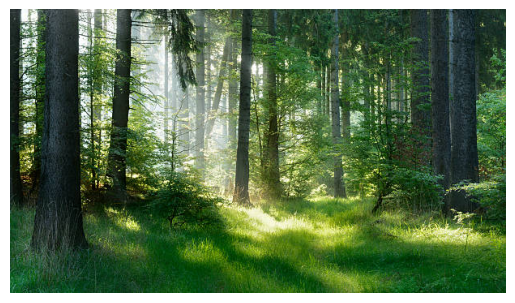

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Load and display an image -- 'forest.jpg'
input_file = "forest.jpg"
img = cv2.imread(input_file)
img = img[:,:,::-1]
plt.axis('off')
plt.imshow(img)

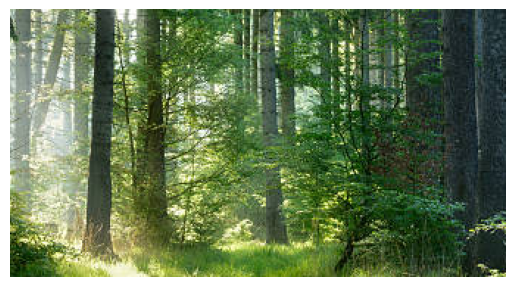

In [2]:
# Cropping an image
h, w = img.shape[:2]
start_row, end_row = int(0.21*h), int(0.73*h)
start_col, end_col= int(0.37*w), int(0.92*w)
img_cropped = img[start_row:end_row, start_col:end_col]
plt.axis('off')
plt.imshow(img_cropped)

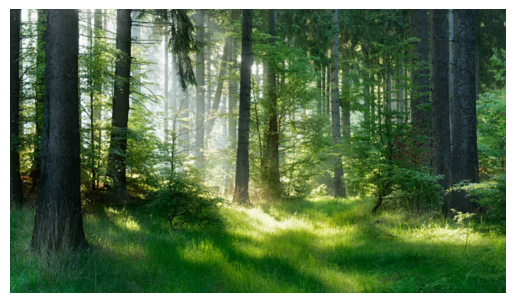

In [3]:
# Resizing an image - UNIFORM
scaling_factor = 2
img_scaled = cv2.resize(img, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_LINEAR)
plt.axis('off')
plt.imshow(img_scaled)

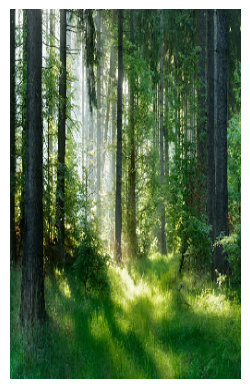

In [4]:
# Resizing an image - SKEW
img_scaled = cv2.resize(img, (250, 400), interpolation=cv2.INTER_AREA)
plt.axis('off')
plt.imshow(img_scaled)

# Detecting Edges

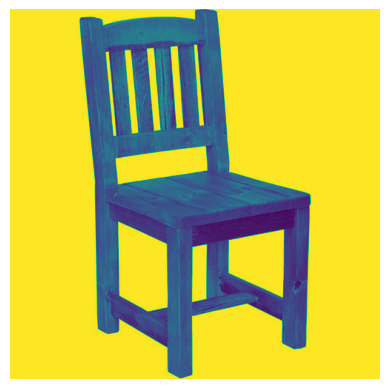

In [5]:
# Convert it to grayscale
input_file = "chair.jpg"
img = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)
h, w = img.shape

# Sobel Filter
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# Laplacian Edge Detector
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Canny Edge Detector
canny = cv2.Canny(img, 50, 240)

plt.axis('off')
plt.imshow(img)

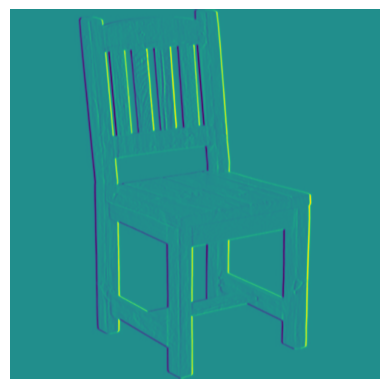

In [6]:
plt.axis('off')
plt.imshow(sobel_horizontal)

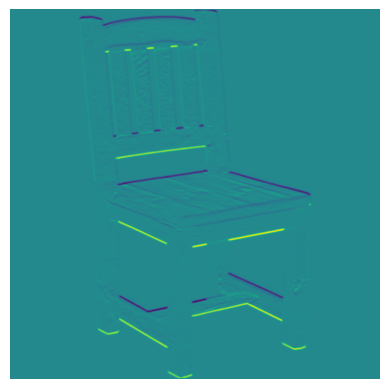

In [7]:
plt.axis('off')
plt.imshow(sobel_vertical)

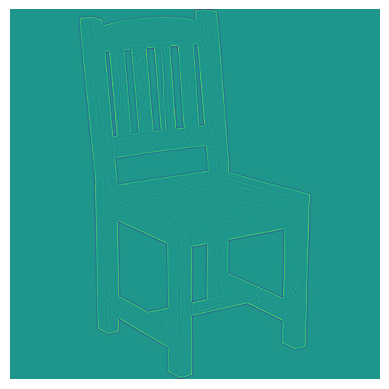

In [8]:
plt.axis('off')
plt.imshow(laplacian)

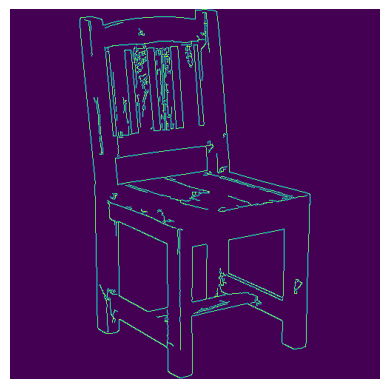

In [9]:
plt.axis('off')
plt.imshow(canny)

# Histogram Equalization

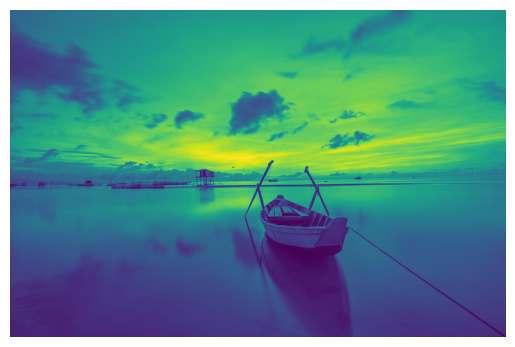

In [10]:
input_file = "sunset.jpg"
img = cv2.imread(input_file)
img = img[:,:,::-1]

# Convert it to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(img_gray)

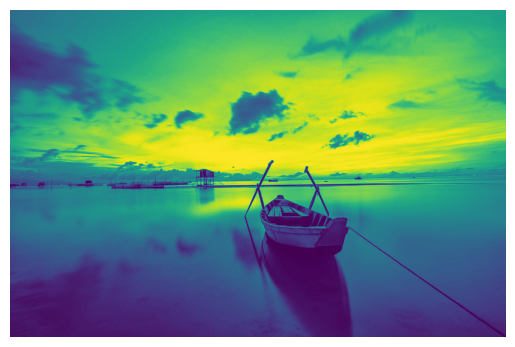

In [11]:
# Equalize the histogram
img_gray_histeq = cv2.equalizeHist(img_gray)
plt.axis('off')
plt.imshow(img_gray_histeq)

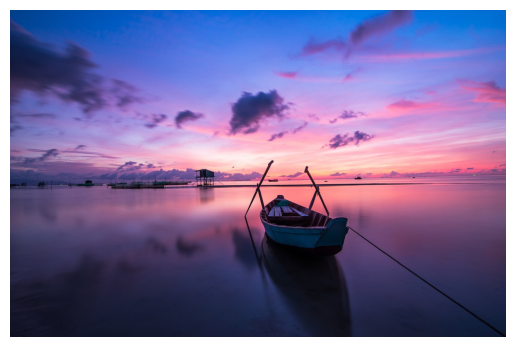

In [12]:
# Histogram equalization of color images
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# Equalizing Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_histeq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

plt.axis('off')
plt.imshow(img)

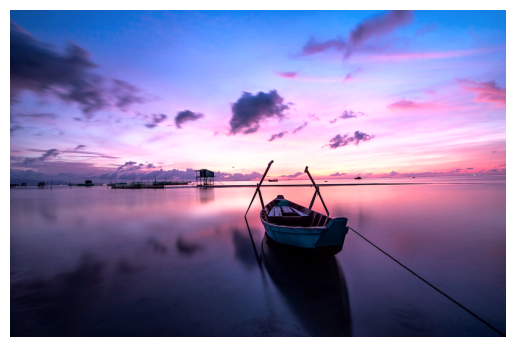

In [13]:
plt.axis('off')
plt.imshow(img_histeq)

# Detecting Corners

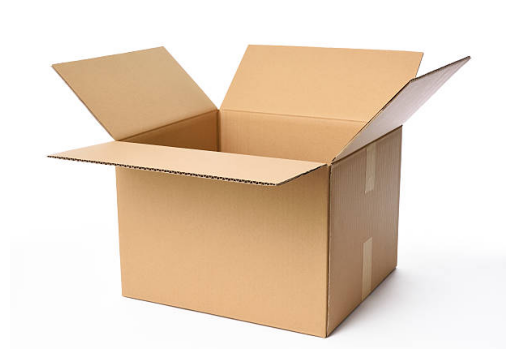

In [14]:
input_file = "box.jpg"
img = cv2.imread(input_file)
img = img[:,:,::-1]
plt.axis('off')
plt.imshow(img)

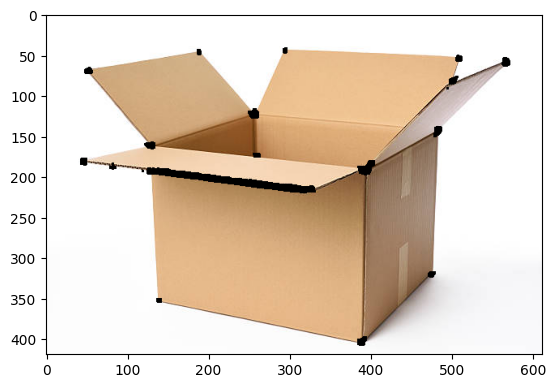

In [15]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img_gray)

# Harris corner detector
img_harris = cv2.cornerHarris(img_gray, 7, 5, 0.04)

# Resultant image is dilated to mark the corners
img_harris = cv2.dilate(img_harris, None)

# Threshold the image
img[img_harris > 0.01 * img_harris.max()] = [0, 0, 0]

plt.imshow(img)

# SIFT Feature Points Detection

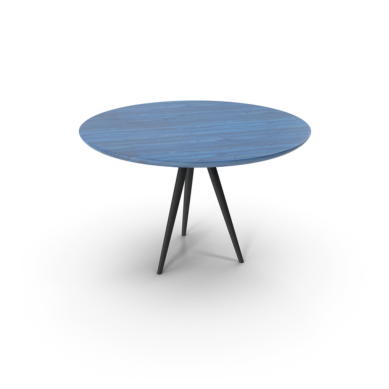

In [16]:
import sys
import cv2
import numpy as np

# Load input image -- 'table.jpg'
input_file = 'table.jpg'
img = cv2.imread(input_file)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(img_gray, None)

img_sift = np.copy(img)
cv2.drawKeypoints(img, keypoints, img_sift,
flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.axis('off')
plt.imshow(img)

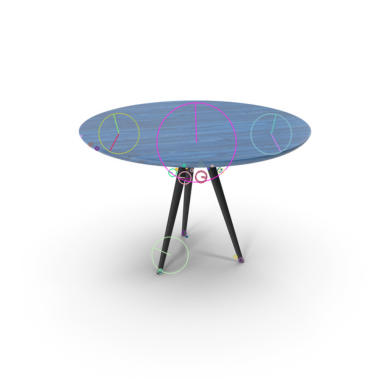

In [17]:
plt.axis('off')
plt.imshow(img_sift)

# Star Feature Detector

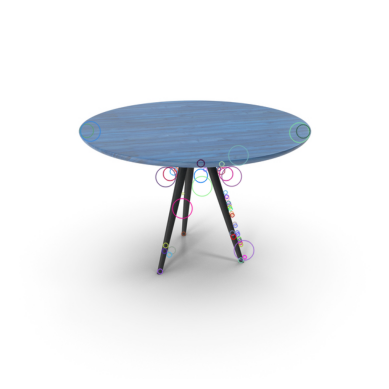

In [18]:
import sys
import cv2
import numpy as np

class StarFeatureDetector(object):
    def __init__(self):
        self.detector = cv2.xfeatures2d.StarDetector_create()
    
    def detect(self, img):
        return self.detector.detect(img)
    

# Load input image -- 'table.jpg'
input_file = 'table.jpg'
input_img = cv2.imread(input_file)

# Convert to grayscale
img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

# Detect features using Star feature detector
keypoints = StarFeatureDetector().detect(input_img)

cv2.drawKeypoints(input_img, keypoints, input_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.axis('off')
plt.imshow(input_img)